In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam

from ann_utils import *

Using TensorFlow backend.


In [2]:
preproc_folder = "enriched_shuffle"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
output_path = "../data/models/"

prefix = 'shuffle_imp_bg_'
postfix = '_190721_1655'
trainfile = '_traindata'
testfile = '_testdata'

[X_train, y_train, feature_labels] = pd.read_pickle(datafolder+prefix+trainfile+postfix+'.pkl') 
[X_test, y_test, feature_labels] = pd.read_pickle(datafolder+prefix+testfile+postfix+'.pkl') 

In [3]:
len(feature_labels)

35

In [16]:
mlp = create_mlp_model(35, 3, [20,10,5], [tf.nn.relu]*3,                                        #35, 2, [20, 5], [tf.nn.relu, tf.nn.relu],
                      optimizer = RMSprop(),
                      loss_func="binary_crossentropy",
                      #kernel_regularizers = [l2(0.001)]*3,
                      dropout = [0.6]*3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 991
Trainable params: 991
Non-trainable params: 0
________________________________________________________

In [17]:
X_train.shape

(46095, 35)

In [ ]:
early_stopping = TerminateOnBaseline(monitor='val_accuracy', baseline=0.99)
batch_size = 32
epochs=5

#creating validation data
validation_size = 10000

X_val = X_train[:validation_size]
partial_X_train = X_train[validation_size:]
y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

history = mlp.fit(partial_X_train, partial_y_train, epochs=epochs,  batch_size = batch_size, verbose=1, 
        steps_per_epoch=math.ceil(X_train.shape[0]/batch_size), #callbacks=[early_stopping],
                 validation_data=(X_val, y_val))
        

In [26]:
history_dict = history.history

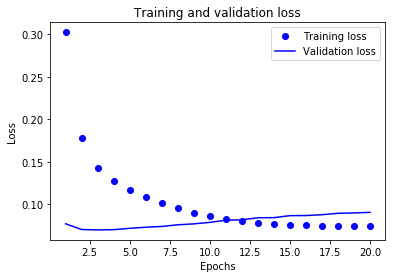

In [27]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

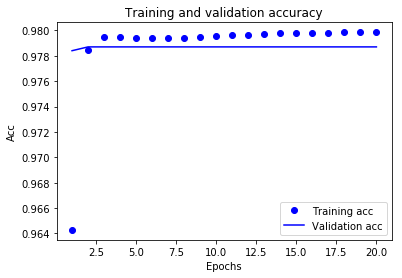

In [28]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()

plt.show()

In [29]:
predictions = mlp.predict(X_test)

In [30]:
predictions.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [31]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, predictions) #false positive rate, true positive rate and thresholds
auc = roc_auc_score(y_test, predictions)
        
print('AUC: {}'.format(auc))

AUC: 0.8823655939141135
